In [1]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import bbknn

In [2]:
import sys
sys.path.insert(0, "../lib")
import sc_utils

In [4]:
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["figure.figsize"] = (8, 8)
pd.set_option('display.max_rows', 500)

In [7]:
ds_full = sc.read_h5ad("../data/02dataset/integrated-manual.h5ad")

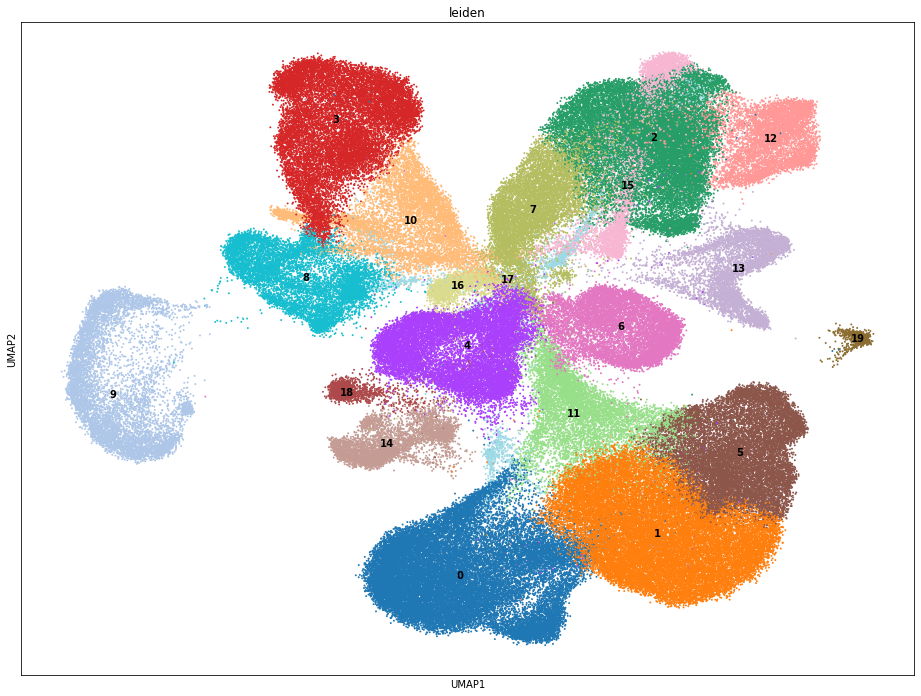

In [8]:
sc.pl.umap(ds_full, color="leiden", size=15, legend_loc="on data")

## Subset only on Stromal clusters

In [9]:
stromal_clusters = ["2", "7", "12", "13", "15"]

In [10]:
ds = ds_full[ds_full.obs.leiden.isin(stromal_clusters), :].copy()

In [11]:
ds.obs["COVID-19"] = ds.obs["COVID-19"].astype("category")

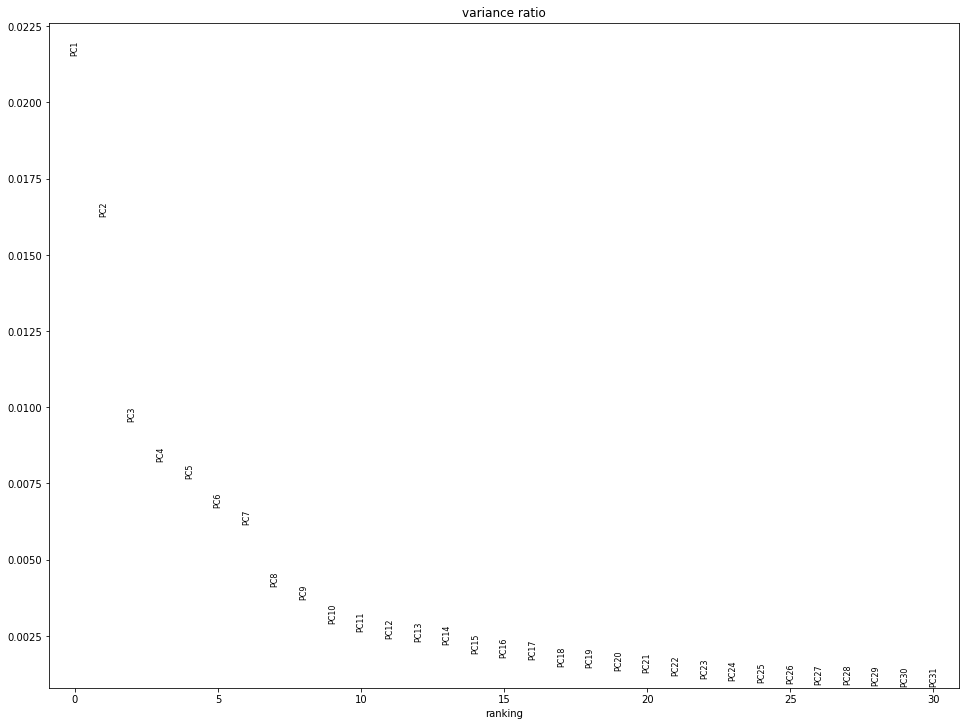

In [12]:
ds = ds.raw.to_adata()
sc.pp.highly_variable_genes(ds, n_top_genes=3000, batch_key="orig.ident")
ds.raw = ds

sc.pp.scale(ds)
sc.tl.pca(ds, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds)

In [13]:
bbknn.bbknn(ds, neighbors_within_batch=int(50 / ds.obs.batch.unique().size), n_pcs=20)

In [14]:
sc.tl.leiden(ds, resolution=0.5)
sc.tl.umap(ds)

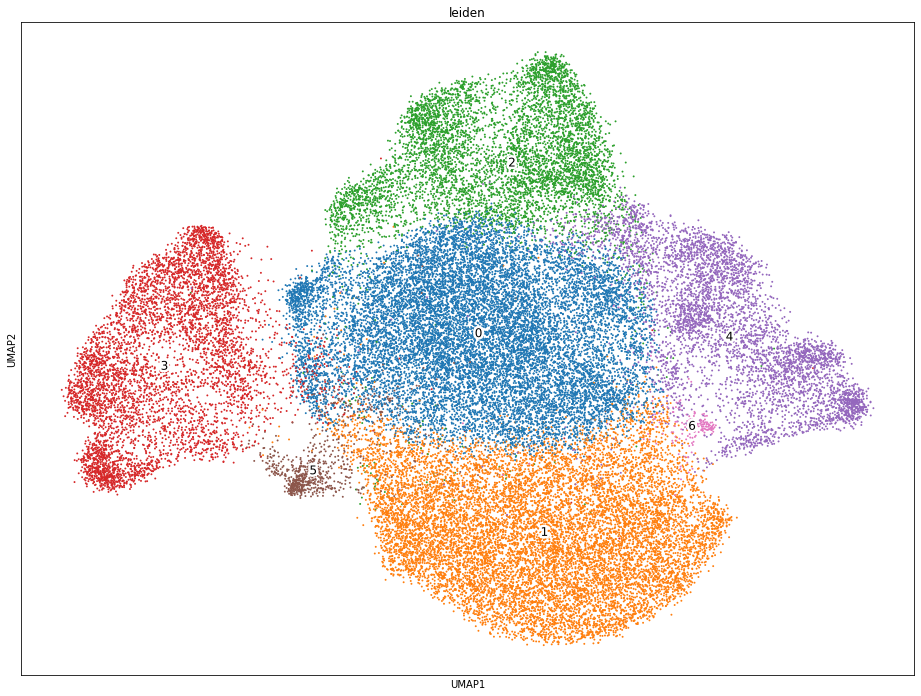

In [15]:
ax = sc.pl.umap(
    ds, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [ ]:
ax = sc.pl.umap(
    ds, 
    color="Sample Name", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

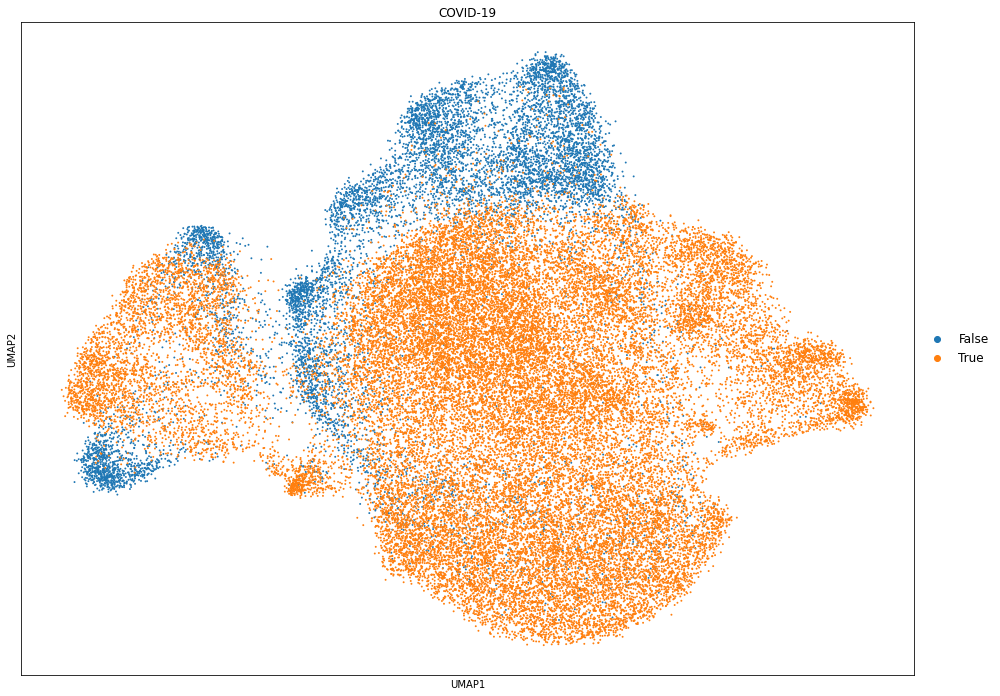

In [17]:
ax = sc.pl.umap(
    ds, 
    color="COVID-19", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

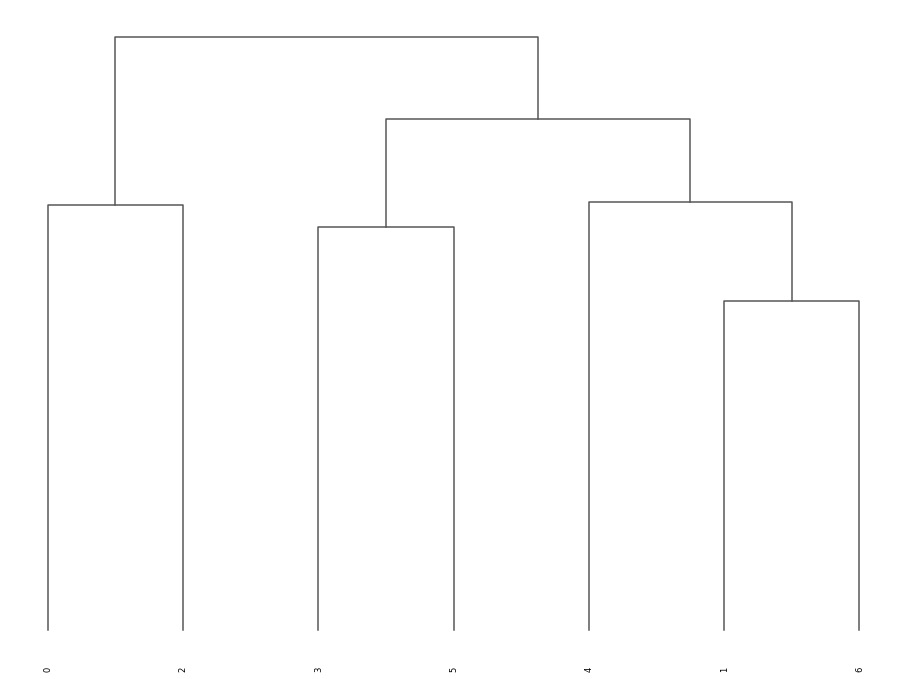

In [18]:
sc.tl.dendrogram(ds, groupby="leiden")
sc.pl.dendrogram(ds, groupby="leiden")

In [19]:
sc.tl.rank_genes_groups(ds, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds, "leiden")

## Marker genes for clusters

In [20]:
markers.groupby("cluster").head(20)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   3.735353  0.953004  0.374194   0.000000e+00       0   
1        0.000000e+00   2.352143  0.873843  0.411036   0.000000e+00       0   
2        0.000000e+00   2.416884  0.890970  0.420103   0.000000e+00       0   
3        0.000000e+00   2.410628  0.879830  0.437601   0.000000e+00       0   
4        0.000000e+00   2.335280  0.838613  0.419130   0.000000e+00       0   
5        0.000000e+00   2.972699  0.787927  0.299402   0.000000e+00       0   
6        0.000000e+00   2.239313  0.858386  0.462957   0.000000e+00       0   
7        0.000000e+00   2.750618  0.796143  0.334632   0.000000e+00       0   
8        0.000000e+00   2.509979  0.759173  0.331777   0.000000e+00       0   
9        0.000000e+00   2.573566  0.744622  0.287681   0.000000e+00       0   
10       0.000000e+00   1.604736  0.843765  0.465811   0.000000e+00       0   
11       0.000000e+00   2.120772  0.805681  0.373186   0.000000e+00       0   
12       0.000000e+00   2.349200  0.743925  0.284860   0.000000e+00       0   
13       0.000000e+00   2.015130  0.871197  0.429641   0.000000e+00       0   
14       0.000000e+00   1.849139  0.830189  0.475652   0.000000e+00       0   
15       0.000000e+00   1.813276  0.838543  0.445459   0.000000e+00       0   
16       0.000000e+00   1.323515  0.873843  0.501343   0.000000e+00       0   
17       0.000000e+00   1.413214  0.844113  0.501713   0.000000e+00       0   
18       0.000000e+00   2.045531  0.772541  0.295943   0.000000e+00       0   
19       0.000000e+00   1.559857  0.862564  0.540570   0.000000e+00       0   
26214    0.000000e+00   1.997186  0.953283  0.331698   0.000000e+00       1   
26215    0.000000e+00   1.836380  0.940842  0.310606   0.000000e+00       1   
26216    0.000000e+00   1.963577  0.949658  0.338198   0.000000e+00       1   
26217    0.000000e+00   1.918174  0.945950  0.309918   0.000000e+00       1   
26218    0.000000e+00   1.698389  0.937217  0.307887   0.000000e+00       1   
26219    0.000000e+00   1.864115  0.939359  0.328386   0.000000e+00       1   
26220    0.000000e+00   1.885460  0.923540  0.336541   0.000000e+00       1   
26221    0.000000e+00   1.668718  0.907967  0.302794   0.000000e+00       1   
26222    0.000000e+00   1.786149  0.895197  0.337510   0.000000e+00       1   
26223    0.000000e+00   1.541779  0.891242  0.342604   0.000000e+00       1   
26224    0.000000e+00   0.891014  0.816594  0.446785   0.000000e+00       1   
26225    0.000000e+00   1.111532  0.786356  0.459565   0.000000e+00       1   
26226    0.000000e+00   1.423797  0.742440  0.446410   0.000000e+00       1   
26227    0.000000e+00   1.432896  0.675455  0.437816   0.000000e+00       1   
26228    0.000000e+00   0.854202  0.637637  0.494563   0.000000e+00       1   
26229    0.000000e+00   1.499019  0.477383  0.346228   0.000000e+00       1   
26230   4.334443e-261   0.936687  0.686908  0.519593  4.334443e-261       1   
26231   4.619181e-250   0.856412  0.605916  0.484907  4.619181e-250       1   
26232   1.031012e-224   0.946410  0.587954  0.415505  1.031012e-224       1   
26233   3.205718e-206   1.344367  0.451430  0.365196  3.205718e-206       1   
52428    0.000000e+00   4.821496  0.973775  0.371891   0.000000e+00       2   
52429    0.000000e+00   5.867746  0.966235  0.311294   0.000000e+00       2   
52430    0.000000e+00   5.284632  0.962793  0.282586   0.000000e+00       2   
52431    0.000000e+00   3.113754  0.988035  0.547978   0.000000e+00       2   
52432    0.000000e+00   6.144124  0.905425  0.047637   0.000000e+00       2   
52433    0.000000e+00   3.447212  0.967055  0.445213   0.000000e+00       2   
52434    0.000000e+00   2.938584  0.973283  0.529313   0.000000e+00       2   
52435    0.000000e+00   5.758191  0.863957  0.077160   0.000000e+00       2   
52436    0.000000e+00   3.477797  0.941321  0.420869   0.000000e+00       2   
52437    0.000000e+00   3.753842  0.911490  0.215469   0.000000e+0

## Violin plot for my collection of epithelial marker genes

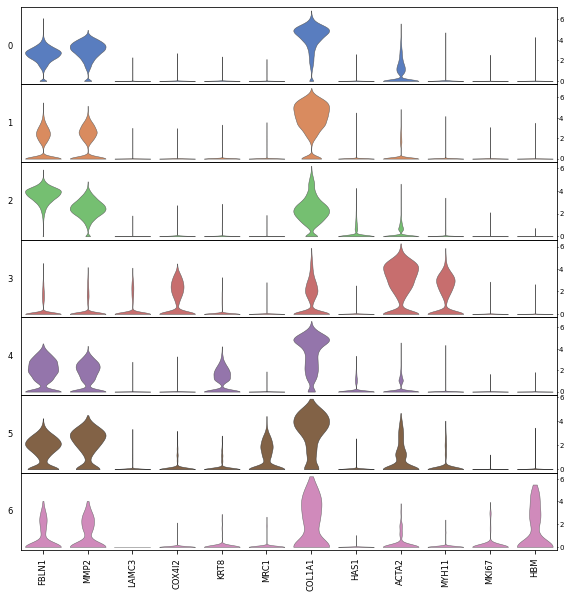

In [30]:
genes = [
    "FBLN1", "MMP2", "LAMC3", "COX4I2", "KRT8", "MRC1", "COL1A1", "HAS1", "ACTA2", "MYH11", "MKI67", "HBM"
]
ax = sc.pl.stacked_violin(
    ds,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

## Name clusters

Clusters 1, 2 & 6 are strange

In [31]:
names = pd.Series([
    "Fibroblasts-1",
    "Fibroblasts-2",
    "Fibroblasts-3, SCARA5",
    "Smooth Muscle cells",
    "Mesothelial",
    "Fibroblast-Macrophage doublets",
    "Erythrocytes"
])

In [32]:
ds.obs["cluster"] = names[ds.obs.leiden.astype(int)].values

... storing 'cluster' as categorical


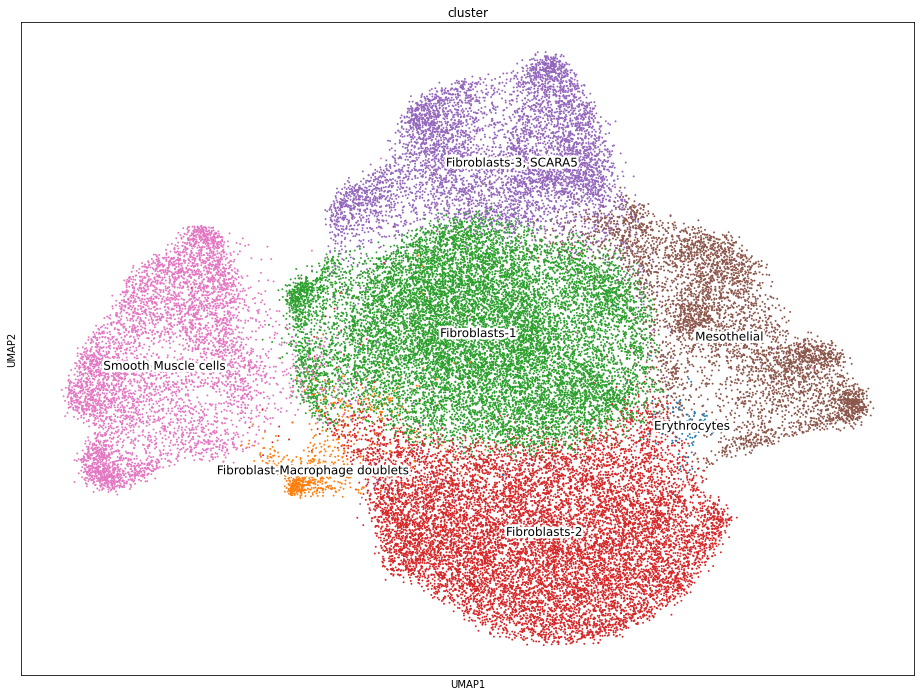

In [33]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

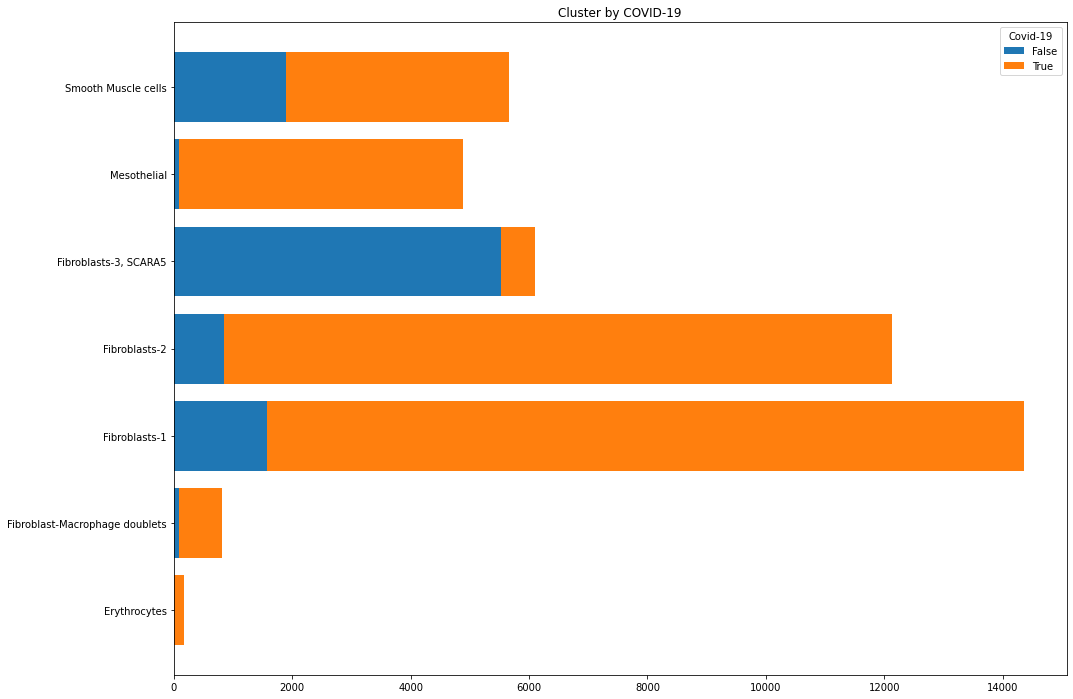

In [34]:
sc_utils.plot_composition(ds, "cluster", "COVID-19")

Only `Fibroblasts-3, SCARA5` come from non-COVID patient

In [ ]:
sc_utils.plot_composition(ds, "cluster", "Sample Name")

## Doublets

In [7]:
dbl_thresholds = {
    "Sample_1": 0.22,
    "Sample_2": 0.3,
    "Sample_3": 0.35,
    "Sample_4": 0.37,
    "Sample_5": 0.4,
    "Sample_6": 0.25,
    "Sample_7": 0.26,
    "Sample_8": 0.41,
    "Sample_9": 0.38,
    "Sample_10": 0.25,
    "Sample_11": 0.4,
    "Sample_12": 0.37,
    "Sample_13": 0.34,
    "Sample_14": 0.38,
    "Sample_15": 0.33,
    "Sample_16": 0.4,
    "Sample_17": 0.38,
    "Sample_18": 0.39,
    "Sample_19": 0.4,
    "Sample_20": 0.4,
    "Sample_21": 0.28,
    "Sample_22": 0.28
}

In [ ]:
doublets = []
for sample, threshold in dbl_thresholds.items():
    batch_num = ds.obs.batch.loc[ds.obs["orig.ident"] == sample].values[0]
    scores = pd.read_csv(f"doublets/{sample}_doublets.csv", index_col=0)
    sample_doublets = "0_" + scores["0"].loc[scores.doublet > threshold].str.replace("\d+$", "") + batch_num
    doublets.append(sample_doublets)
    print(f"{sample} has {sample_doublets.size}")
doublets = pd.concat(doublets)
doublets.shape

In [9]:
ds.obs["doublet"] = False
ds.obs.doublet[ds.obs_names.isin(doublets)] = True
ds.obs.doublet = ds.obs.doublet.astype("category")
ds.obs.doublet.value_counts()

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    43902
True       237
Name: doublet, dtype: int64

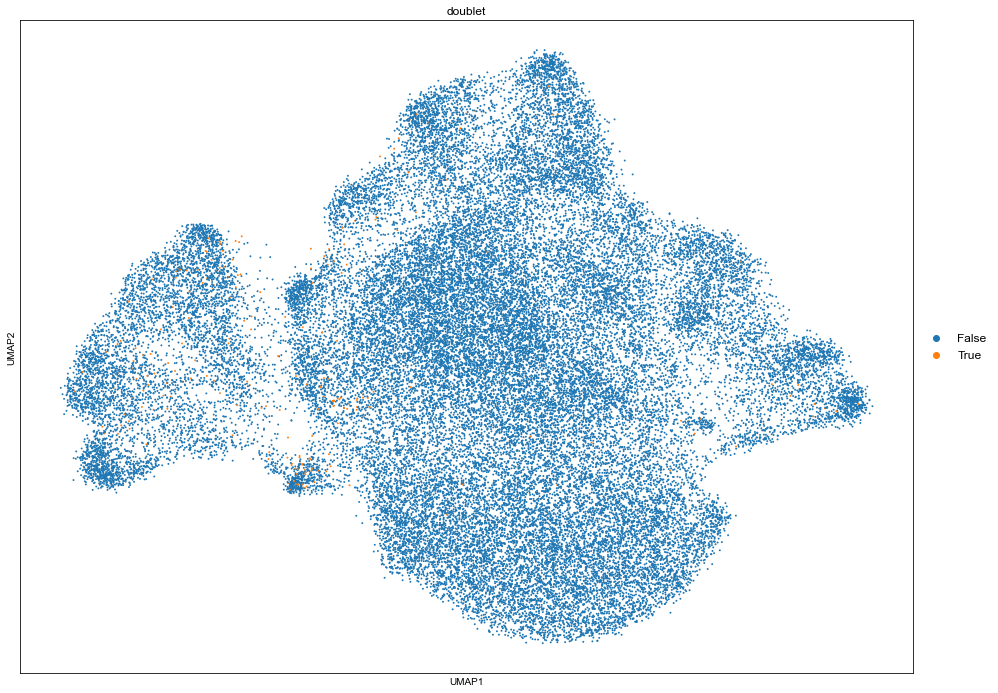

In [10]:
ax = sc.pl.umap(
    ds, 
    color="doublet", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5,
    cmap="YlOrRd"
)

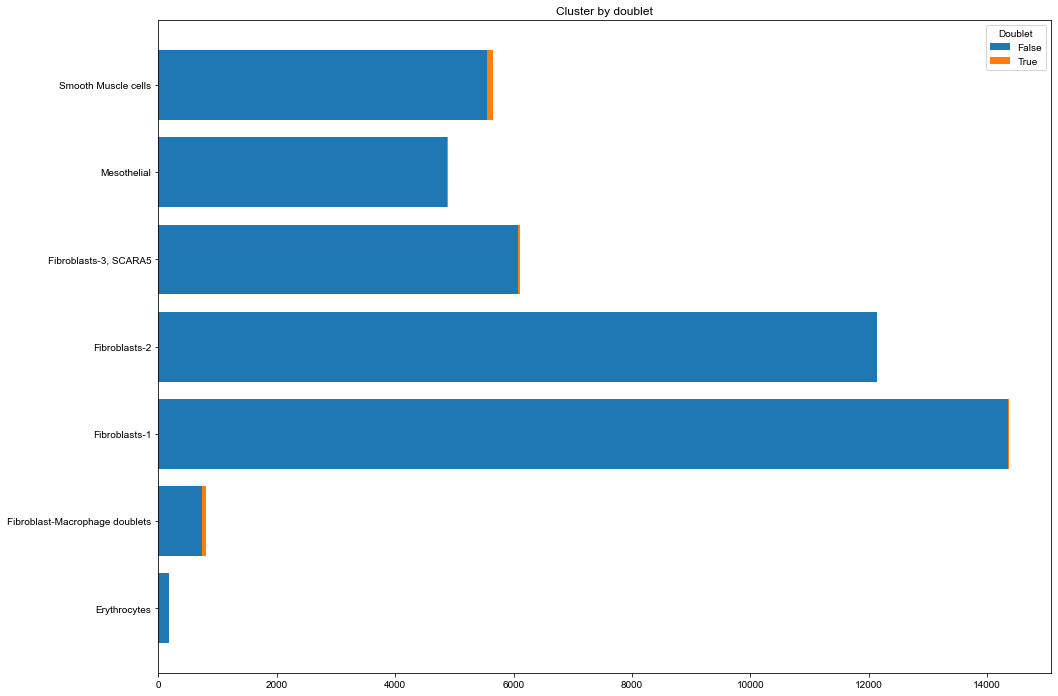

In [11]:
sc_utils.plot_composition(ds, "cluster", "doublet")

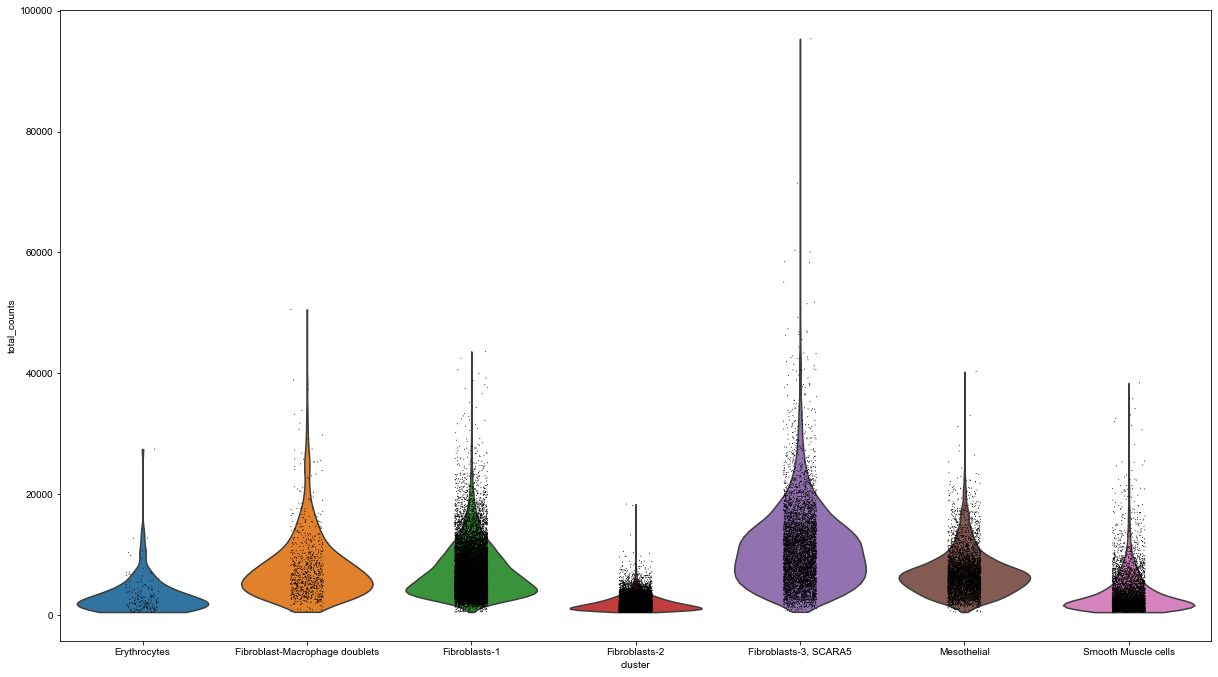

In [12]:
sc.pl.violin(ds, "total_counts", "cluster")

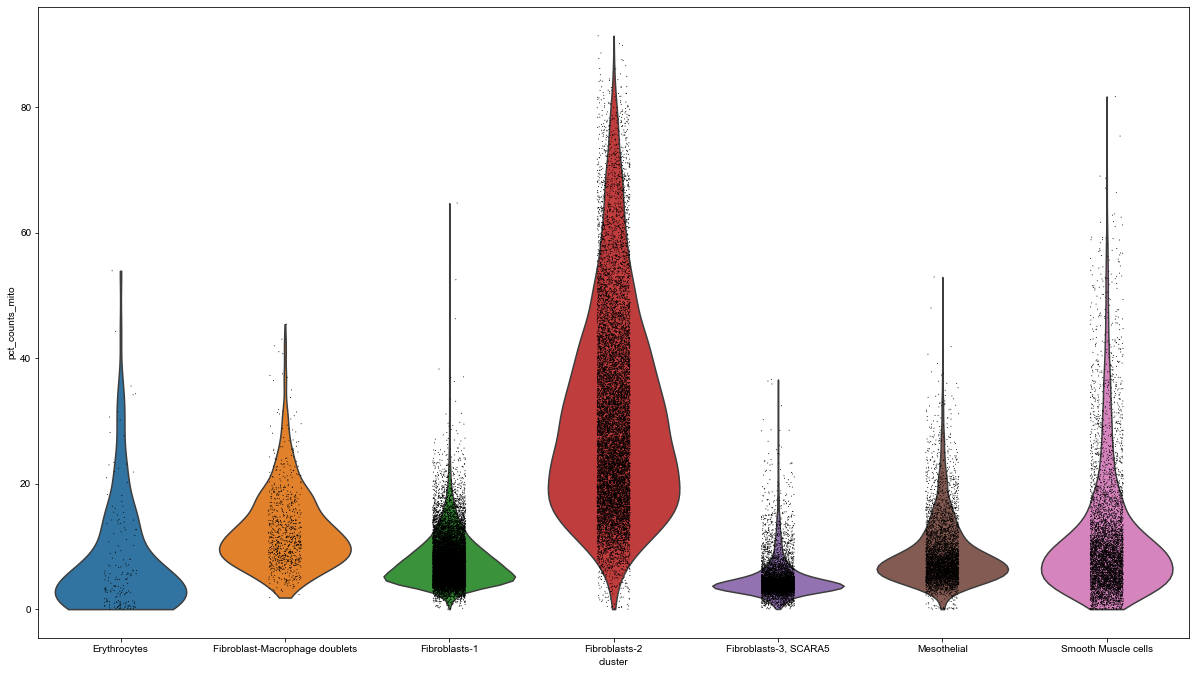

In [13]:
sc.pl.violin(ds, "pct_counts_mito", "cluster")

## Reprocess without doublets and low-q cells

In [14]:
ds2 = ds.raw.to_adata()

In [15]:
ds2 = ds2[~ds2.obs.doublet.astype(bool), :]
ds2 = ds2[~ds2.obs.cluster.isin(["Fibroblasts-2", "Fibroblast-Macrophage doublets"]), :]

Trying to set attribute `.var` of view, copying.


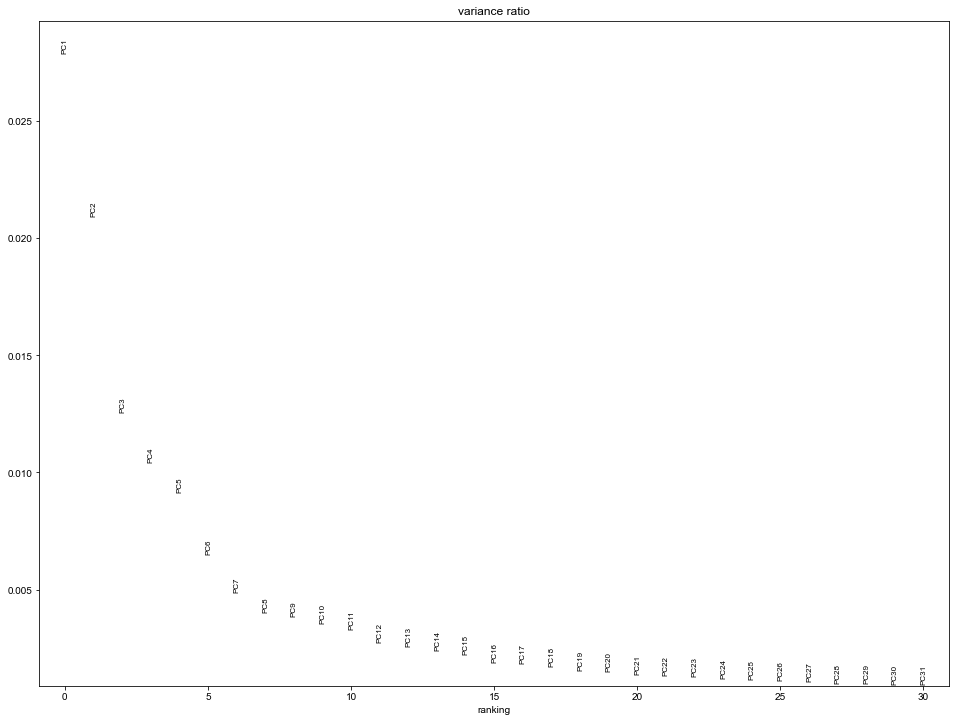

In [16]:
sc.pp.highly_variable_genes(ds2, n_top_genes=3000, batch_key="orig.ident")
ds2.raw = ds2

sc.pp.scale(ds2)
sc.tl.pca(ds2, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds2)

In [17]:
bbknn.bbknn(ds2, neighbors_within_batch=int(50 / ds2.obs.batch.unique().size), n_pcs=20)

In [22]:
sc.tl.leiden(ds2, resolution=0.6)
sc.tl.umap(ds2)

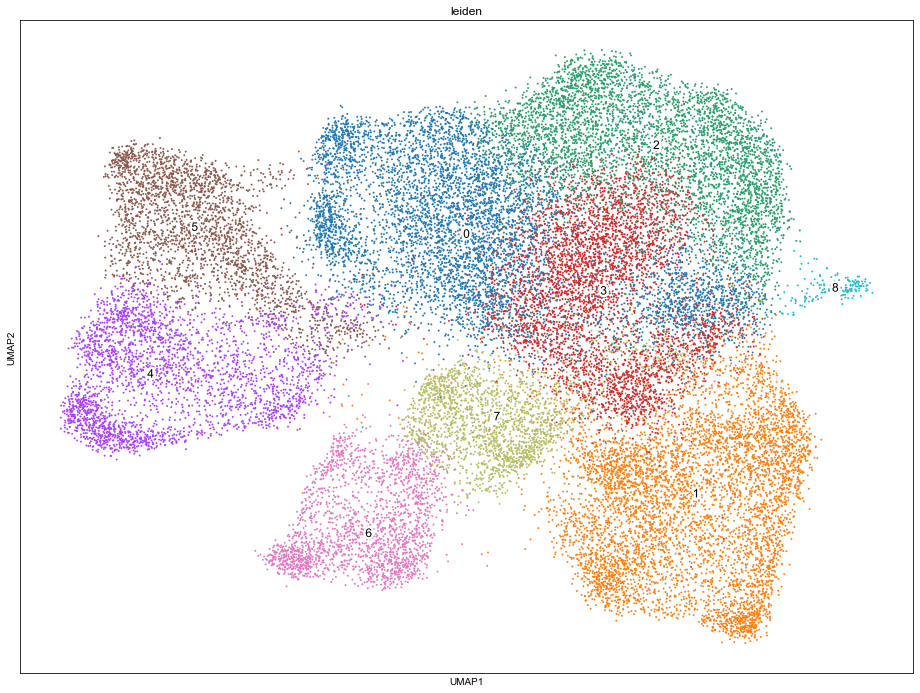

In [23]:
ax = sc.pl.umap(
    ds2, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

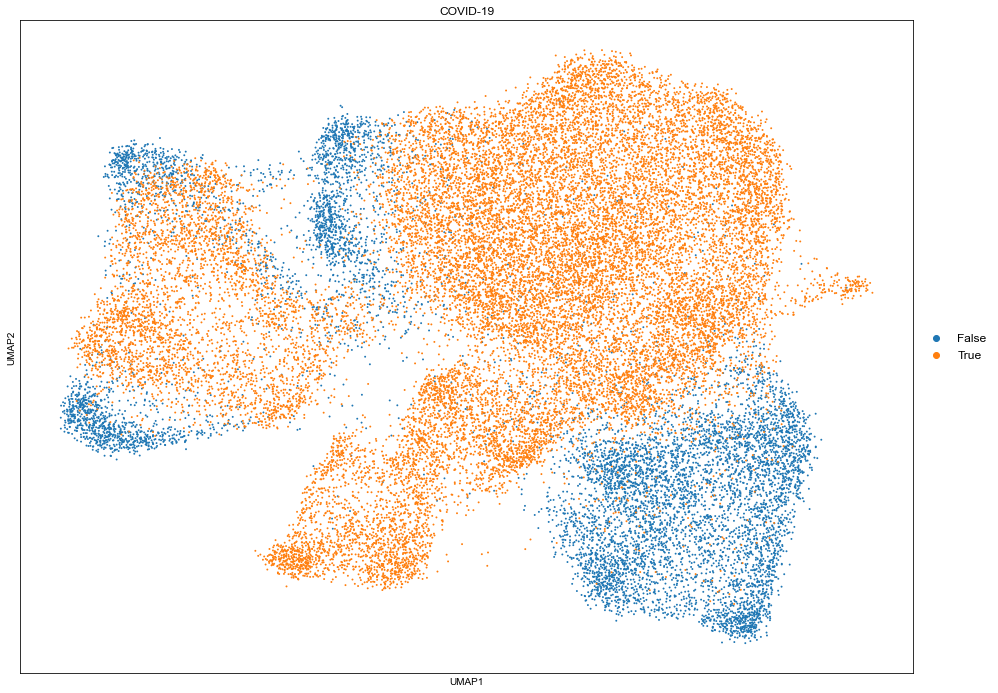

In [24]:
ax = sc.pl.umap(
    ds2, 
    color="COVID-19", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

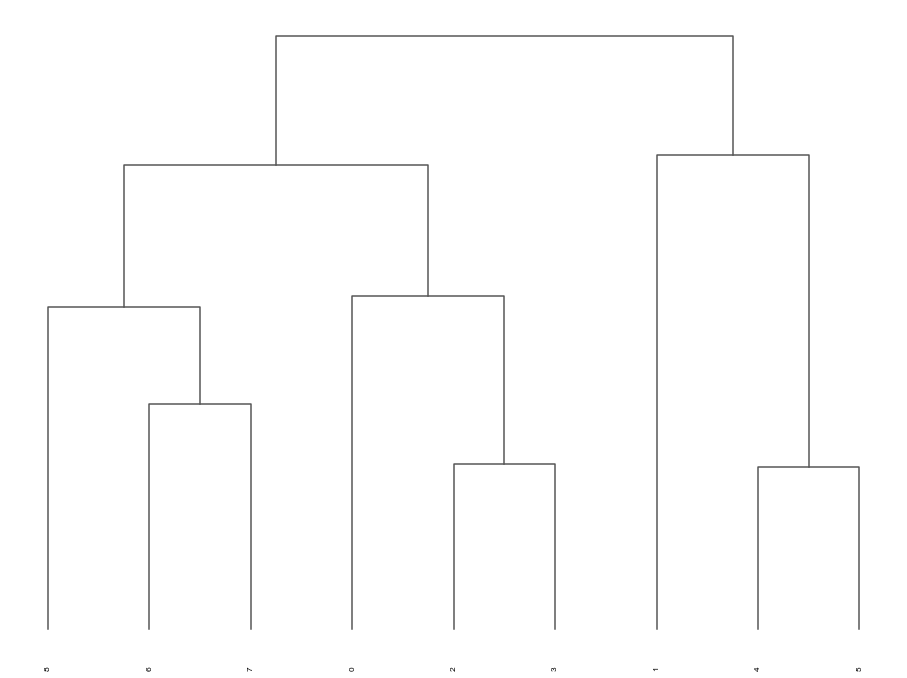

In [25]:
sc.tl.dendrogram(ds2, groupby="leiden")
sc.pl.dendrogram(ds2, groupby="leiden")

In [26]:
sc.tl.rank_genes_groups(ds2, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds2, "leiden")

In [27]:
markers.groupby("cluster").head(10)

p_val  avg_logFC     pct.1     pct.2     p_val_adj cluster  \
0       0.000000e+00   2.811469  0.896916  0.378257  0.000000e+00       0   
1       0.000000e+00   2.767509  0.883604  0.397917  0.000000e+00       0   
2       0.000000e+00   1.937505  0.894805  0.477686  0.000000e+00       0   
3       0.000000e+00   2.527199  0.848052  0.430725  0.000000e+00       0   
4       0.000000e+00   2.655289  0.898377  0.494210  0.000000e+00       0   
5       0.000000e+00   1.907854  0.809091  0.394661  0.000000e+00       0   
6       0.000000e+00   2.088666  0.818019  0.383081  0.000000e+00       0   
7       0.000000e+00   1.429198  0.836039  0.492884  0.000000e+00       0   
8       0.000000e+00   1.418491  0.803247  0.494532  0.000000e+00       0   
9       0.000000e+00   1.366653  0.749026  0.497628  0.000000e+00       0   
26214   0.000000e+00   4.516159  0.970524  0.317665  0.000000e+00       1   
26215   0.000000e+00   5.633005  0.968180  0.296357  0.000000e+00       1   
26216   0.000000e+00   6.145796  0.914420  0.056023  0.000000e+00       1   
26217   0.000000e+00   4.850883  0.954279  0.287578  0.000000e+00       1   
26218   0.000000e+00   2.756917  0.982080  0.583815  0.000000e+00       1   
26219   0.000000e+00   3.045936  0.957126  0.428913  0.000000e+00       1   
26220   0.000000e+00   2.744179  0.966505  0.505965  0.000000e+00       1   
26221   0.000000e+00   3.669890  0.914587  0.248673  0.000000e+00       1   
26222   0.000000e+00   5.341490  0.848769  0.096285  0.000000e+00       1   
26223   0.000000e+00   3.836362  0.877407  0.268305  0.000000e+00       1   
52428   0.000000e+00   3.010802  0.940191  0.391012  0.000000e+00       2   
52429   0.000000e+00   2.300203  0.964550  0.481728  0.000000e+00       2   
52430   0.000000e+00   2.083639  0.967812  0.498373  0.000000e+00       2   
52431   0.000000e+00   2.603562  0.880165  0.427669  0.000000e+00       2   
52432   0.000000e+00   2.706683  0.973684  0.466937  0.000000e+00       2   
52433   0.000000e+00   2.035323  0.879730  0.491413  0.000000e+00       2   
52434   0.000000e+00   2.088349  0.906046  0.532080  0.000000e+00       2   
52435   0.000000e+00   2.803612  0.981296  0.503670  0.000000e+00       2   
52436   0.000000e+00   3.143842  0.810787  0.269577  0.000000e+00       2   
52437   0.000000e+00   2.600173  0.828621  0.402588  0.000000e+00       2   
78642   0.000000e+00   2.929204  0.981477  0.470969  0.000000e+00       3   
78643   0.000000e+00   2.131359  0.970132  0.502901  0.000000e+00       3   
78644   0.000000e+00   2.785675  0.981477  0.511511  0.000000e+00       3   
78645   0.000000e+00   1.781221  0.943505  0.488638  0.000000e+00       3   
78646   0.000000e+00   2.830430  0.939106  0.396923  0.000000e+00       3   
78647   0.000000e+00   1.869665  0.922899  0.489350  0.000000e+00       3   
78648   0.000000e+00   1.907570  0.874740  0.439711  0.000000e+00       3   
78649   0.000000e+00   2.368446  0.795555  0.343803  0.000000e+00       3   
78650   0.000000e+00   1.179897  0.922204  0.565979  0.000000e+00       3   
78651   0.000000e+00   1.866107  0.838389  0.417812  0.000000e+00       3   
104856  0.000000e+00   4.138509  0.813605  0.304712  0.000000e+00       4   
104857  0.000000e+00   3.519521  0.772591  0.341205  0.000000e+00       4   
104858  0.000000e+00   5.484076  0.674225  0.064567  0.000000e+00       4   
104859  0.000000e+00   2.994702  0.807269  0.441087  0.000000e+00       4   
104860  0.000000e+00   1.223231  0.857286  0.478258  0.000000e+00       4   
104861  0.000000e+00   0.962350  0.887296  0.543288  0.000000e+00       4   
104862  0.000000e+00   5.646425  0.624208  0.035851  0.000000e+00       4   
104863  0.000000e+00   3.566824  0.680894  0.233832  0.000000e+00       4   
104864  0.000000e+00   2.676877  0.747249  0.390468  0.000000e+00       4   
104865  0.000000e+00   4.274707  0.624542  0.117897  0.000000e+00       4   
131070  0.000000e+00   5.355376  0.989045  0.401391  0.000000e+00       5   
131071  0.0

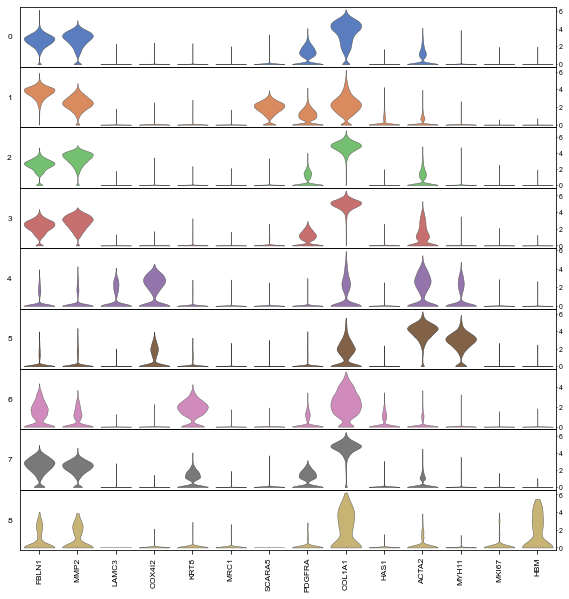

In [28]:
genes = [
    "FBLN1", "MMP2", "LAMC3", "COX4I2", "KRT8", "MRC1", "SCARA5",
    "PDGFRA", "COL1A1", "HAS1", "ACTA2", "MYH11", "MKI67", "HBM"
]
ax = sc.pl.stacked_violin(
    ds2,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

In [29]:
names = pd.Series([
    "Fibroblasts-1",
    "Fibroblasts-2, SCARA5",
    "Fibroblasts-3",
    "Fibroblasts-4",
    "Smooth muscle-1",
    "Smooth muscle-2",
    "Mesothelial-1",
    "Mesothelial-2",
    "Erythrocytes"
])

In [30]:
ds2.obs["cluster"] = names[ds2.obs.leiden.astype(int)].values

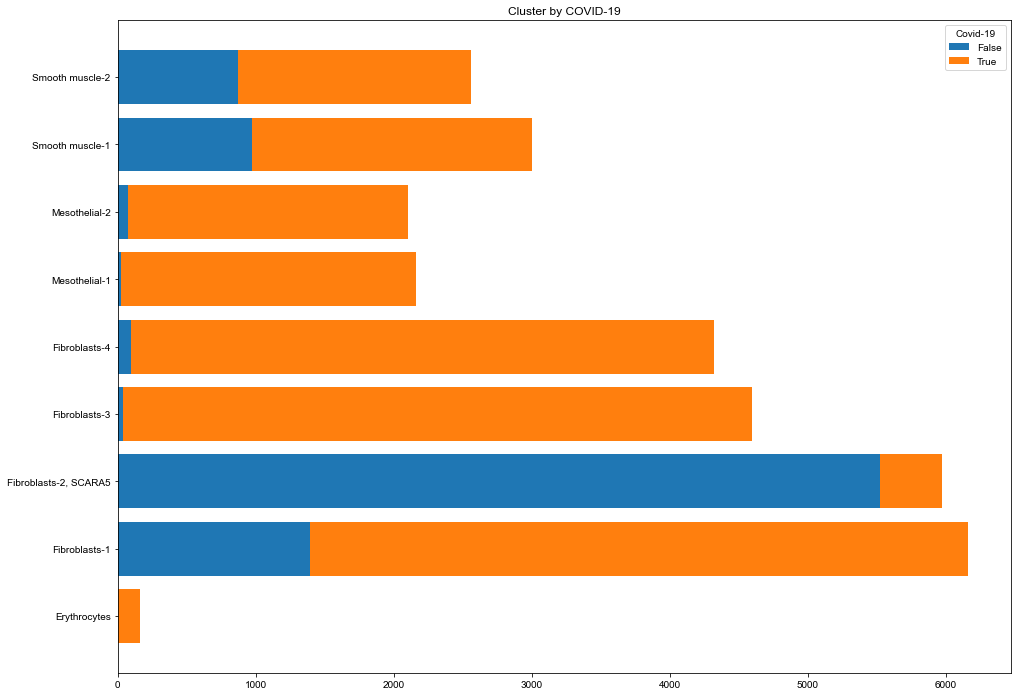

In [31]:
sc_utils.plot_composition(ds2, "cluster", "COVID-19")

In [ ]:
sc_utils.plot_composition(ds2, "cluster", "Sample Name")

Erythrocytes look like a sampling bias

In [8]:
ds2 = ds2[ds2.obs.cluster != "Erythrocytes", :].copy()

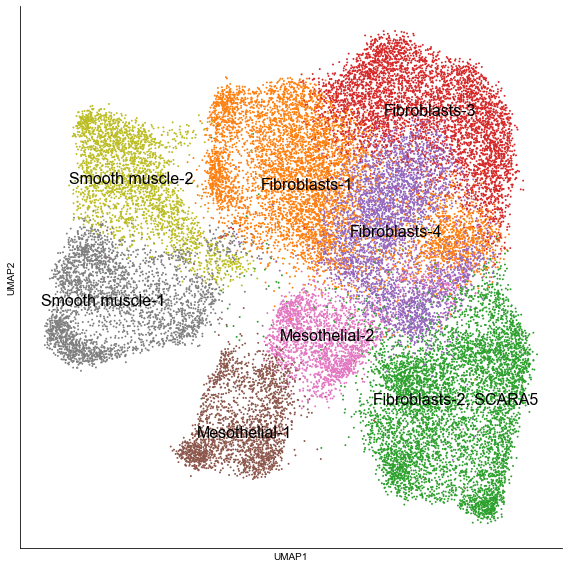

In [9]:
ax = sc.pl.umap(
    ds2,
    color="cluster", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=16, 
    legend_fontweight="normal",
#     legend_fontoutline=5
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.figure.tight_layout()
ax.figure.savefig("plots/21stromal-umap.pdf")

In [ ]:
ax = sc.pl.umap(
    ds2, 
    color="Sample Name", 
    size=15, 
    show=False, 
#     legend_loc="on data",
    legend_fontsize=18, 
    legend_fontweight="normal",
#     legend_fontoutline=5
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, frameon=False, title="Patient", title_fontsize=14,
          fontsize=16, loc="lower left", labelspacing=0.2)#, bbox_to_anchor=(0.4, 1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.figure.tight_layout()
ax.figure.savefig("plots/25stromal-patient.pdf")

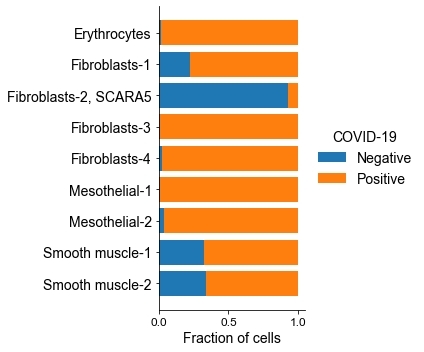

In [6]:
left = np.zeros(len(ds2.obs.cluster.unique()))
fig, ax = plt.subplots(figsize=(6, 5))
totals = ds2.obs.cluster.value_counts().sort_index()
for s in sorted(ds2.obs["COVID-19"].astype(str).unique()):
    cnt = ds2.obs.cluster[ds2.obs["COVID-19"] == s].value_counts().sort_index() / totals
    ax.barh(list(reversed(cnt.index)), list(reversed(cnt.values)), left=left, label=s)
    left += list(reversed(cnt))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Negative", "Positive"], title="COVID-19", 
          loc="center left", bbox_to_anchor=(1, 0.5),
          frameon=False, fontsize=14, title_fontsize=14)
# ax.set_title("Cluster by patient", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="x", labelsize=12)#, rotation=45)
ax.tick_params(axis="y", labelsize=14)
# ax.set_xticklabels([
#     "CD4 T cells", "Tregs", "CD8 T cells", 
#     "Proliferating CD4 T cells", "Proliferating CD8 T cells",
#     "MoAM1", "MoAM2", "MoAM3", "TRAM1", "TRAM2"
# ], ha="right")
ax.set_xlabel("Fraction of cells", fontsize=14)
ax.figure.tight_layout()
ax.figure.savefig("plots/24stromal-covid-clusters.pdf")

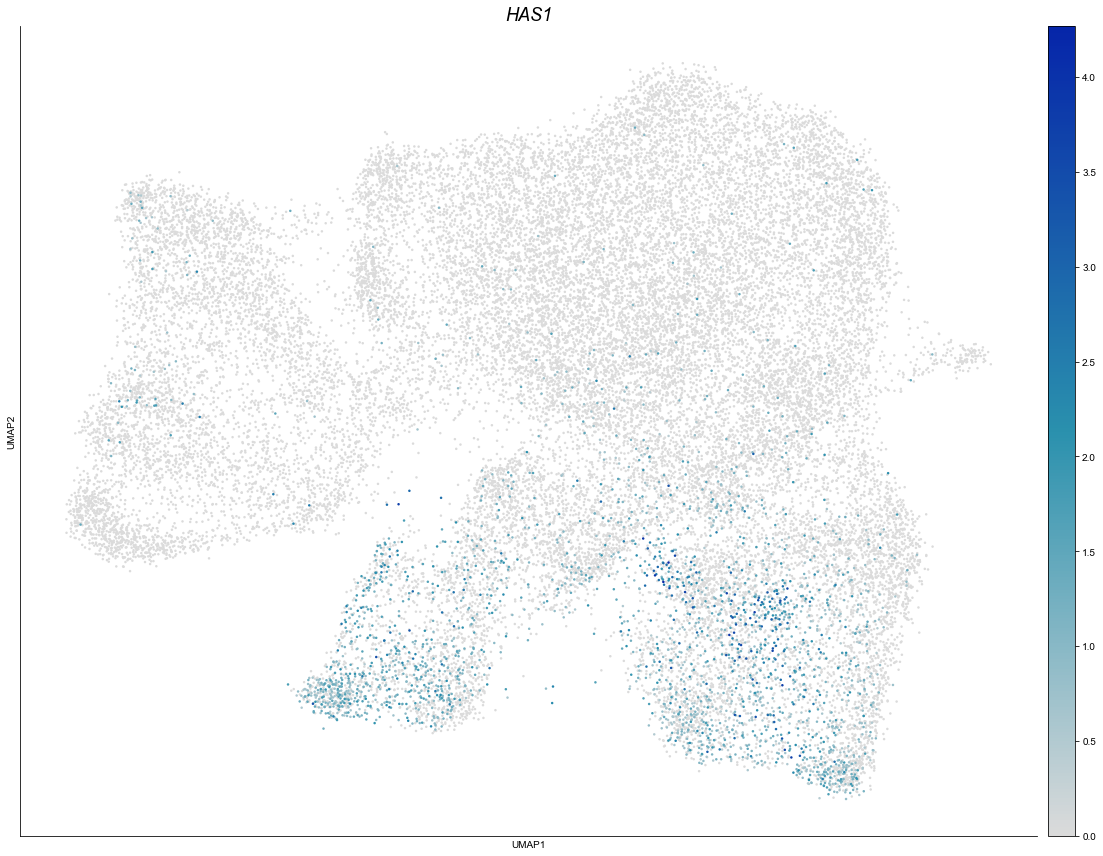

In [33]:
ax = sc.pl.umap(
    ds2, 
    color="HAS1", 
    size=25, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5,
    cmap=sc_utils.expr_colormap()
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("HAS1", fontstyle="italic", fontsize=18)
ax.figure.tight_layout()
ax.figure.savefig("plots/22stromal_has1.pdf")

## Plot genes mentioned in the paper

In [12]:
paper_genes = [
    "ACTA2", "PLIN2", "TWIST1", "FGF2", "SNAI1", "WT1", "LTBP2", 
    "VEGFA", "ITGA8", "ABL2", "MYC", "FAP",
    "PDGFRA", "PDGFRB", "CSF1", "CD34", "FBN1", 
    "FBLN2", "VIT", "MYLK", "NEBL", "MYO10", "RYR2", "HAS2", "CXCL14"
]
len(paper_genes)

25

In [13]:
# remove FGF2, SNAI1, WT1, MYLK, NEBL, MYO10 and RYR2
paper_genes2 = [
    "ACTA2", "PLIN2", "TWIST1", "LTBP2", 
    "VEGFA", "ITGA8", "ABL2", "MYC", "FAP",
    "PDGFRA", "PDGFRB", "CSF1", "CD34", "FBN1", 
    "FBLN2", "VIT", "NEBL", "HAS2", "CXCL14"
]
len(paper_genes2)

19

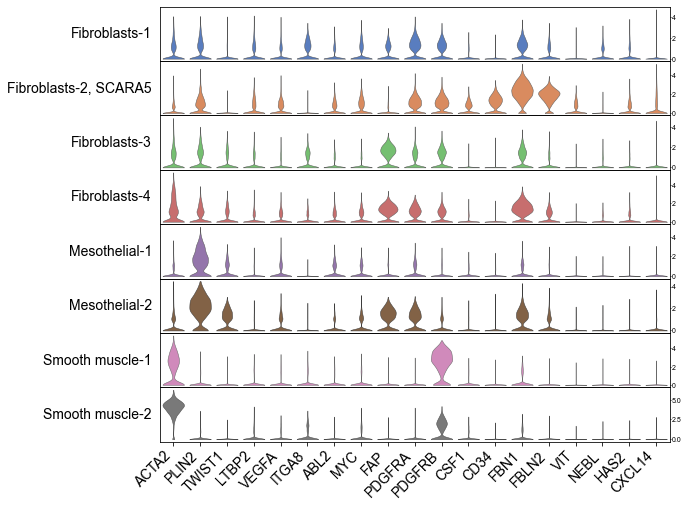

In [14]:
ax = sc.pl.stacked_violin(
    ds2,
    paper_genes2,
    groupby="cluster",
    rotation=90,
    figsize=(len(paper_genes2) * 0.5, 8),
    show=False
)
for a in ax:
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    p = a.get_position()
    p.x0 += 0.1
    p.x1 += 0.1
    a.set_position(p)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontsize=14, ha="right")
ax[0].figure.savefig("plots/23stromal-violins.pdf")

In [34]:
ds2.write_h5ad("../data/02dataset/13stromal.h5ad")

In [35]:
markers.cluster = names[markers.cluster.astype(int)].values

In [36]:
markers.to_csv("../data/02dataset/13stromal-markers.csv")